In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from sklearn.metrics import classification_report

In [107]:
#!pip install -r requirements.txt

## Data Loading preview

In [108]:
file_data = 'dataset_SCL.csv'
df_raw = pd.read_csv(file_data, sep=",")
df_raw.head(3).append(df_raw.tail(3))

Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [109]:
display(df_raw.describe())
display(df_raw.info())
display(df_raw.isnull().sum())

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


None

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

## Visualizations to understand data

### 1. Flight numbers per airline

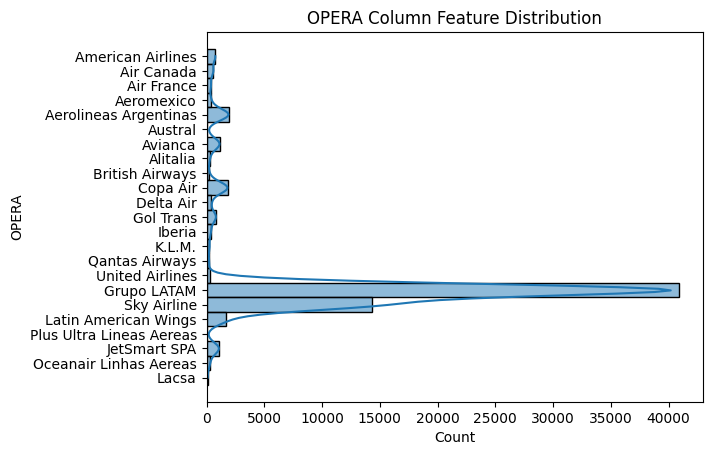

In [110]:
col_visualize = "OPERA"

sns.histplot(df_raw, y=col_visualize, kde=True)
plt.title(col_visualize+ ' Column Feature Distribution')
plt.show()

Its importante double check to this data

In [111]:
display(df_raw[col_visualize].value_counts())

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

It is clear that there are more flights and therefore more records of two airlines. This will cause independent of what predictive model we use, these airlines are key to achieving a prediction.
Therefore the question to ask now:

¿What impact do these airlines have in terms of arrears of their flights?

### 2. Flight Type Distribution

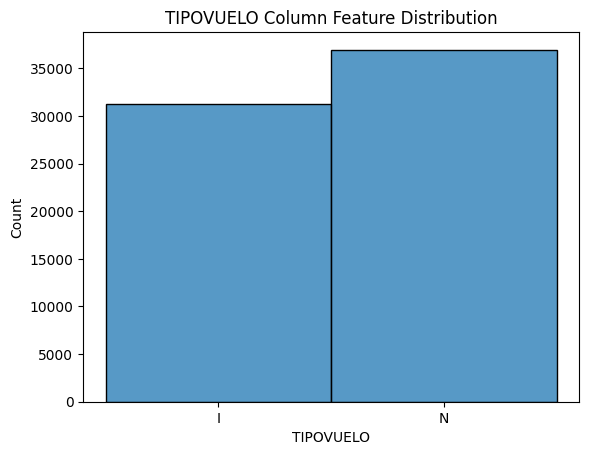

In [112]:
col_visualize = "TIPOVUELO"

sns.histplot(df_raw, x=col_visualize)
plt.title(col_visualize+ ' Column Feature Distribution')
plt.show()

A very large significance is not appreciated in terms of amount of data for national and international flights

### 3. Types of flights with airlines

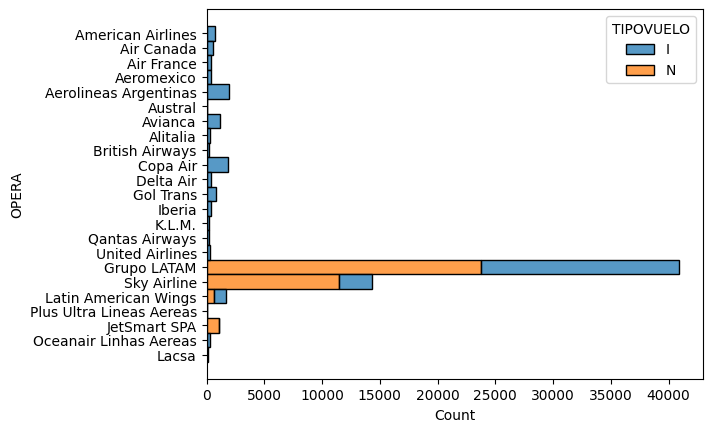

In [113]:
col_visualize = ["OPERA","TIPOVUELO"]
sns.histplot(data=df_raw, y="OPERA", hue="TIPOVUELO", multiple="stack")
plt.show()

#### 4. Visualize OPERA v/s month

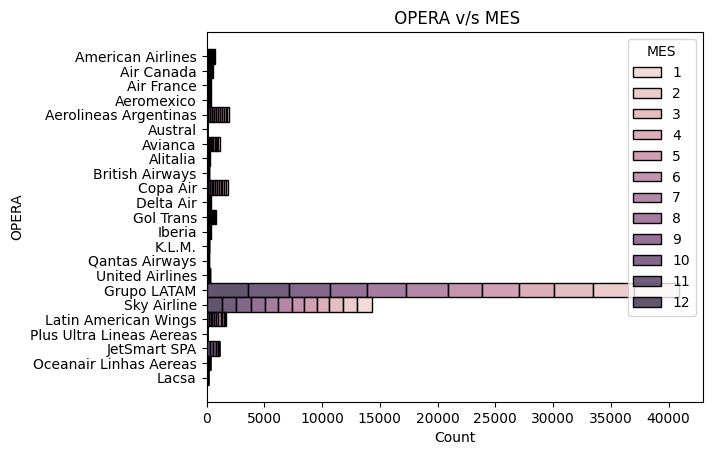

In [114]:
sns.histplot(data=df_raw, y="OPERA", hue="MES", multiple="stack")
plt.title(' OPERA v/s MES')
plt.show()

#### 5. Visualize OPERA v/s Day of flight

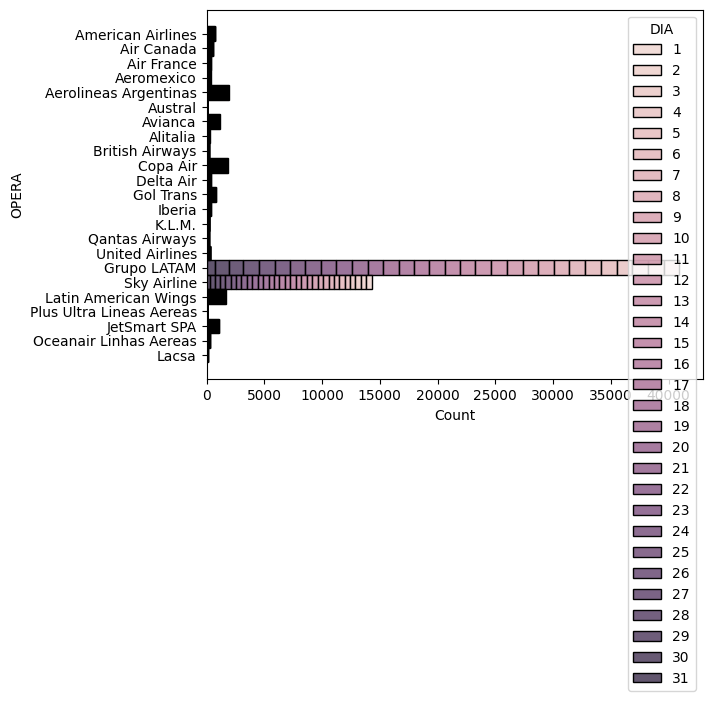

In [115]:
sns.histplot(data=df_raw, y="OPERA", hue="DIA", multiple="stack")
plt.show()

#### 5. Visualize OPERA v/s Des-I

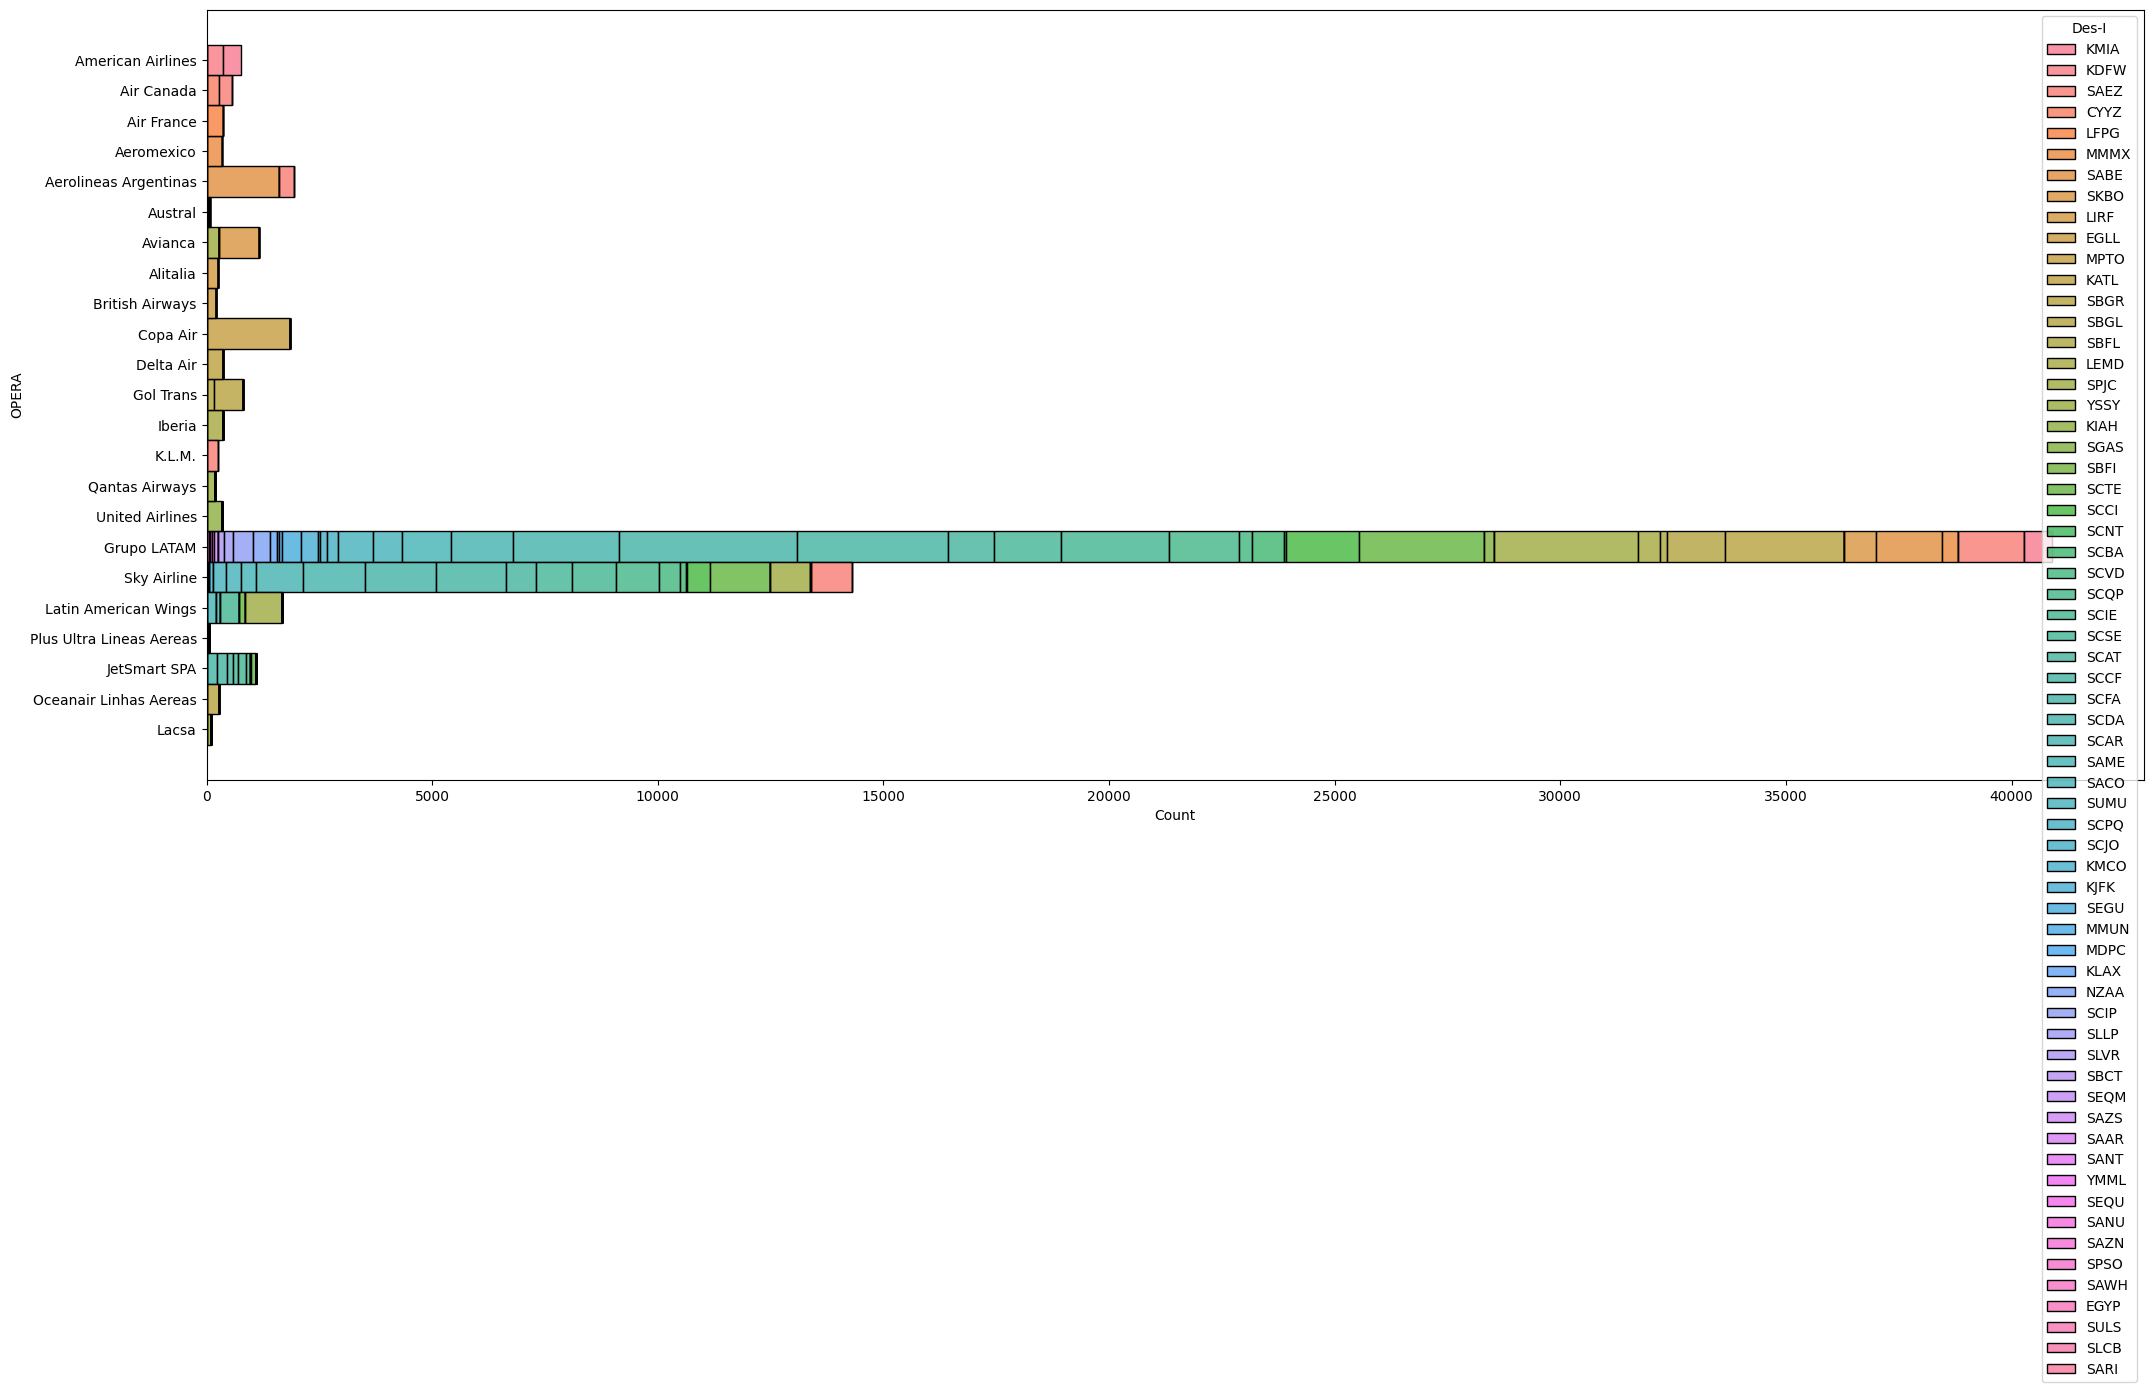

In [116]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(ax=ax,data=df_raw, y="OPERA", hue="Des-I", multiple="stack")
plt.show()

#### 5. Visualize OPERA v/s DIANOM

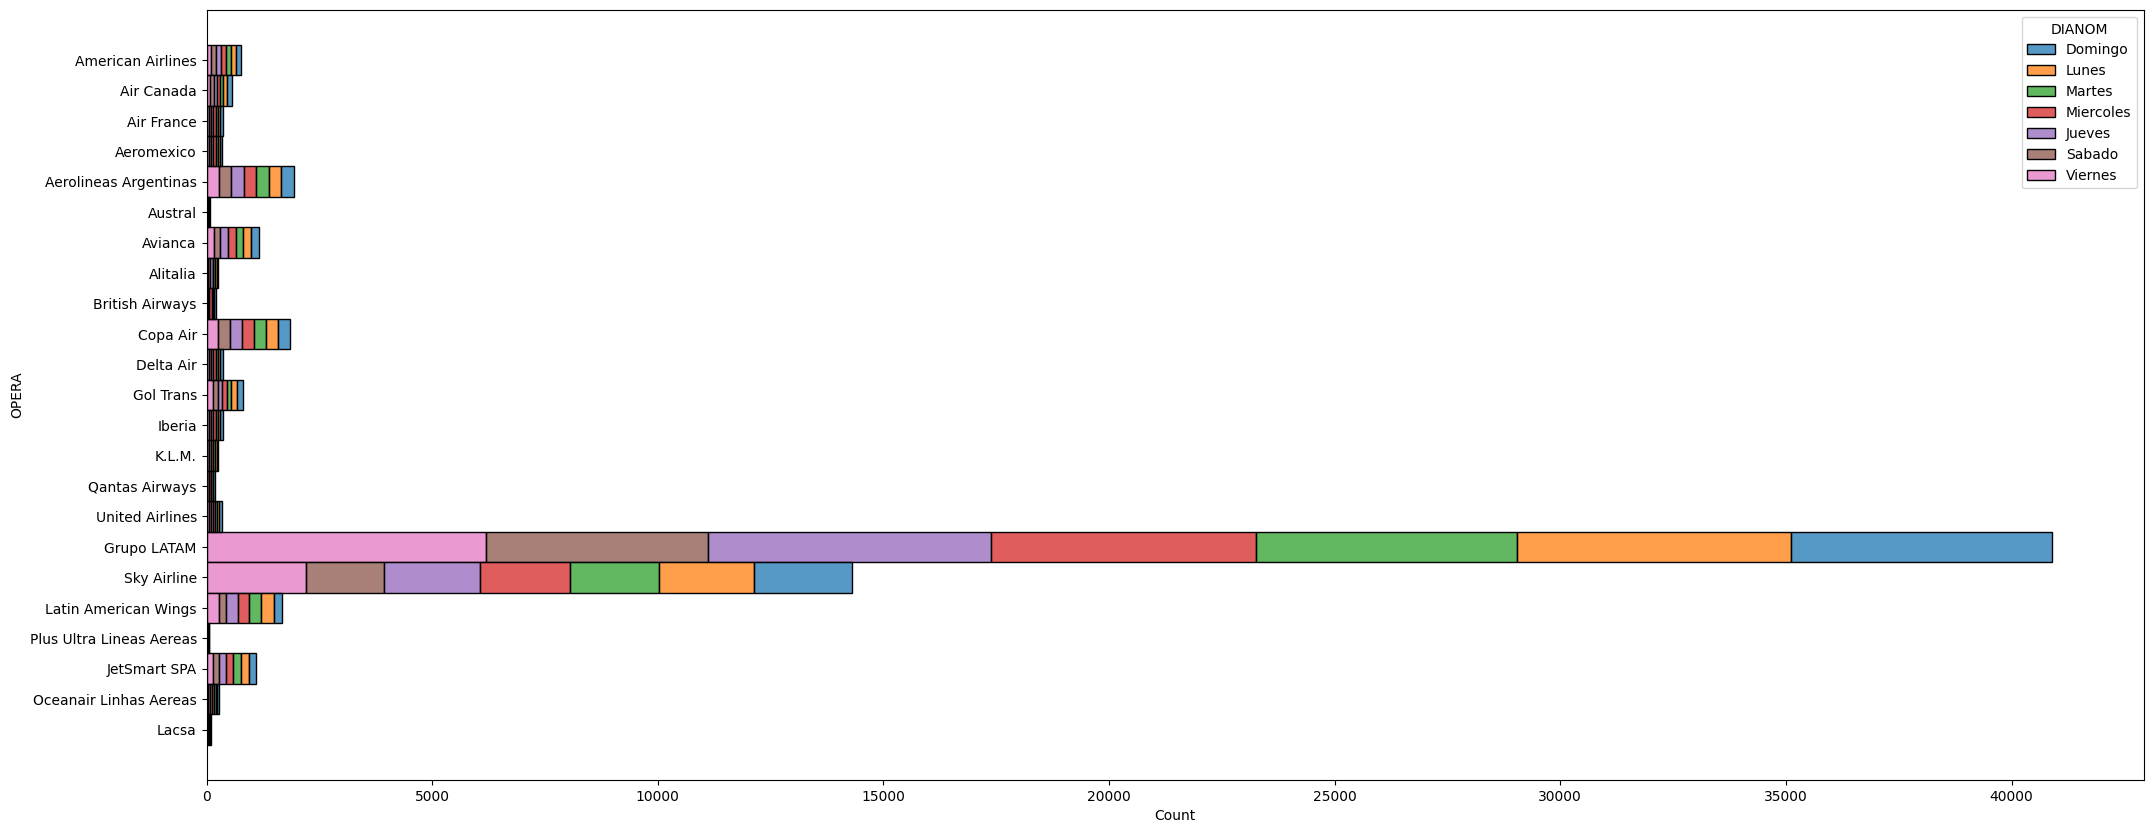

In [117]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(ax=ax,data=df_raw, y="OPERA", hue="DIANOM", multiple="stack")
plt.show()

#### Q.1 : Conclusions
1. There is a clear imbalance in the data and they will be biased by the data provided by the LATAM GROUP airline, so the delay behavior will be characterized by this airline.
For this reason, the distribution of data around OPERA continues to be displayed.

    1.1 Considering the airlines GRUPO LATAM and SKY AIRLINES, it can be seen that most of the flights are domestic and will have an impact on the characterization of the behavior of flight delays.

    1.2 There is a large amount of data with a destination flight with a component of its first two initials SC, which correspond to flights to Chile.
    
    1.3 It is seen that the days of operation of the flights are balanced between the different airlines.

2. Now, by generating the variable of interest delay_15 we will be able to verify the direct or indirect relationship of the data with flight delays, for which reason new conclusions will be made later.

### Q.2: Creation of flight delay feature

1. #### Before we will validate the data types to have a correct transformation of the data

In [118]:
# Define the data types for each column
dtypes= {"Vlo-I":"int", "Ori-I":"str", "Des-I":"str","Emp-I":"str","Vlo-O":"int","Ori-O":"str","Des-O":"str","Emp-O":"str","DIA":"int",
"MES":"int","AÑO":"int", "DIANOM":"str", "TIPOVUELO":"str", "OPERA":"str", "SIGLAORI":"str", "SIGLADES":"str"}

try:
    df_raw = df_raw.astype(dtypes)
except ValueError as e:
    print(e)
#This error is because the column Vlo-I has a value that is not a number, so we have to remove it

invalid literal for int() with base 10: '989P'


There are mislabeled data, for that reason they are deleted

Get the data types int and the transform to numeric with errors = 'coerce' to convert the values that are not numeric to NaN, by
#example the value 989P that is not a number

In [119]:
columns_int = [k for k, v in dtypes.items() if v == 'int']
df_raw[columns_int] = df_raw[columns_int].apply(pd.to_numeric, errors='coerce')

We will check the rows with NaN values and remove them

In [120]:
df_raw[df_raw.isna().any(axis=1)].head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200.0,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
13906,2017-03-30 10:30:00,71.0,SCEL,SCIE,SKU,2017-03-30 10:50:00,NaN,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071.0,SCEL,SCIE,SKU,2017-03-22 11:00:00,NaN,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion


Now we can transform the features date to datetime, that will help us to work with them with errors = 'coerce' to convert the values that are not numeric to NaN, by


In [121]:
cols_date= ["Fecha-I", "Fecha-O"]
df_raw[cols_date] = df_raw[cols_date].apply(pd.to_datetime, errors='coerce')

Now remove the rows with NaN values and convert the columns to the correct data type 

In [122]:
df_raw = df_raw.dropna()
df_raw = df_raw.astype(dtypes)

In [123]:
df_raw.head(3).append(df_raw.tail(3))
df_raw.shape

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(68185, 18)

The logic requested between dates is applied, for that reason, having transformed it to datetime has an advantage.
The special case of December and March is handled considering that December is the last month of the year and there will be nothing greater than that and considering the months before March.
Another way to do it was to use the columns of months, days, year delivered in the data.
All constraints are used under a mask and then a simple assignment.

#### Q.2.1

In [124]:
mask = (((df_raw['Fecha-I'].dt.strftime('%m-%d') >= "12-15") | (df_raw['Fecha-I'].dt.strftime('%m-%d') <= "03-03")) |
        ((df_raw['Fecha-I'].dt.strftime('%m-%d') >= "07-15") & (df_raw['Fecha-I'].dt.strftime('%m-%d') <= "07-31")) |
        ((df_raw['Fecha-I'].dt.strftime('%m-%d') >= "09-11") & (df_raw['Fecha-I'].dt.strftime('%m-%d') <= "09-30")) 
        )
df_raw.loc[mask, "temporada_alta"]  = 1
df_raw.loc[~mask,"temporada_alta"]  = 0

Now we must verify if the mask is well applied and for this we have that the months considered as high season should be = [1,2,3,7,9,12] and the same with the days in each month.

In [125]:
df_raw.loc[df_raw['temporada_alta'] == 1]['Fecha-I'].dt.month.unique()

array([ 1,  2,  3,  7,  9, 12])

#### Q.2.2 Create feature dif_min

In [126]:
df_raw = df_raw.assign(dif_min = (df_raw['Fecha-O'] - df_raw['Fecha-I']).astype('timedelta64[m]'))

We verify the difference in minutes taking a sample and verifying that it is correct

In [127]:
df_raw.head(3).append(df_raw.tail(3))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1.0,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1.0,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1.0,9.0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1.0,40.0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1.0,13.0
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1.0,9.0


#### Q.2.3 Create feature atraso_15

The logic is simple, by means of an appty specify the delay cunplimiento conditions with the limit_delay variable and assign it to the new delay variable

In [128]:
limit_delay= 15
df_raw["atraso_15"] = df_raw["dif_min"].apply(lambda x: 1 if x > limit_delay else 0)

Verify the result

In [129]:
df_raw.loc[df_raw['atraso_15'] == 1].head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,1,2017,Sabado,I,American Airlines,Santiago,Miami,1.0,34.0,1
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1.0,40.0,1
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1.0,69.0,1


#### Q.2.4 Create feature periodo_dia

Like above, we create masks considering the time at HH: mm and then we only apply the restrictions and wee in a dictionary to be able to dynamically apply them

In [130]:
mask_morning    = ((df_raw['Fecha-I'].dt.strftime('%H:%M') >= "05:00") & (df_raw['Fecha-I'].dt.strftime('%H:%M') <= "11:59")) 
mask_afternoon  = ((df_raw['Fecha-I'].dt.strftime('%H:%M') >= "12:00") & (df_raw['Fecha-I'].dt.strftime('%H:%M') <= "18:59")) 
mask_night      = ((df_raw['Fecha-I'].dt.strftime('%H:%M') >= "19:00") | (df_raw['Fecha-I'].dt.strftime('%H:%M') <= "04:59")) 

for key, mask in {"mañana": mask_morning, "tarde":mask_afternoon, "noche":mask_night}.items():
    df_raw.loc[mask, "periodo_dia"]  = key

We verify what is done

In [131]:
df_raw.head(3).append(df_raw.tail(3))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1.0,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1.0,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1.0,9.0,0,noche
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1.0,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1.0,13.0,0,tarde
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,...,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1.0,9.0,0,tarde


In [132]:
file_data_syntetic = 'synthetic_features.csv'
df_raw.to_csv(file_data_syntetic, index=False, sep=',')

### Q.3 Visualization of Feature Engineer Results

The graphs to be displayed are separated to identify the relationship between the delay rate and the different features.
The delay rate should be calculated as the amount of delays on the data filtered by the feature. A simple way to determine it is using the help of value_counts() which gives us the quantified data from now on and by means of the normalize parameter it gives us the already determined percentages. Then it is enough to rearrange them and iterate through each feature and visualize it

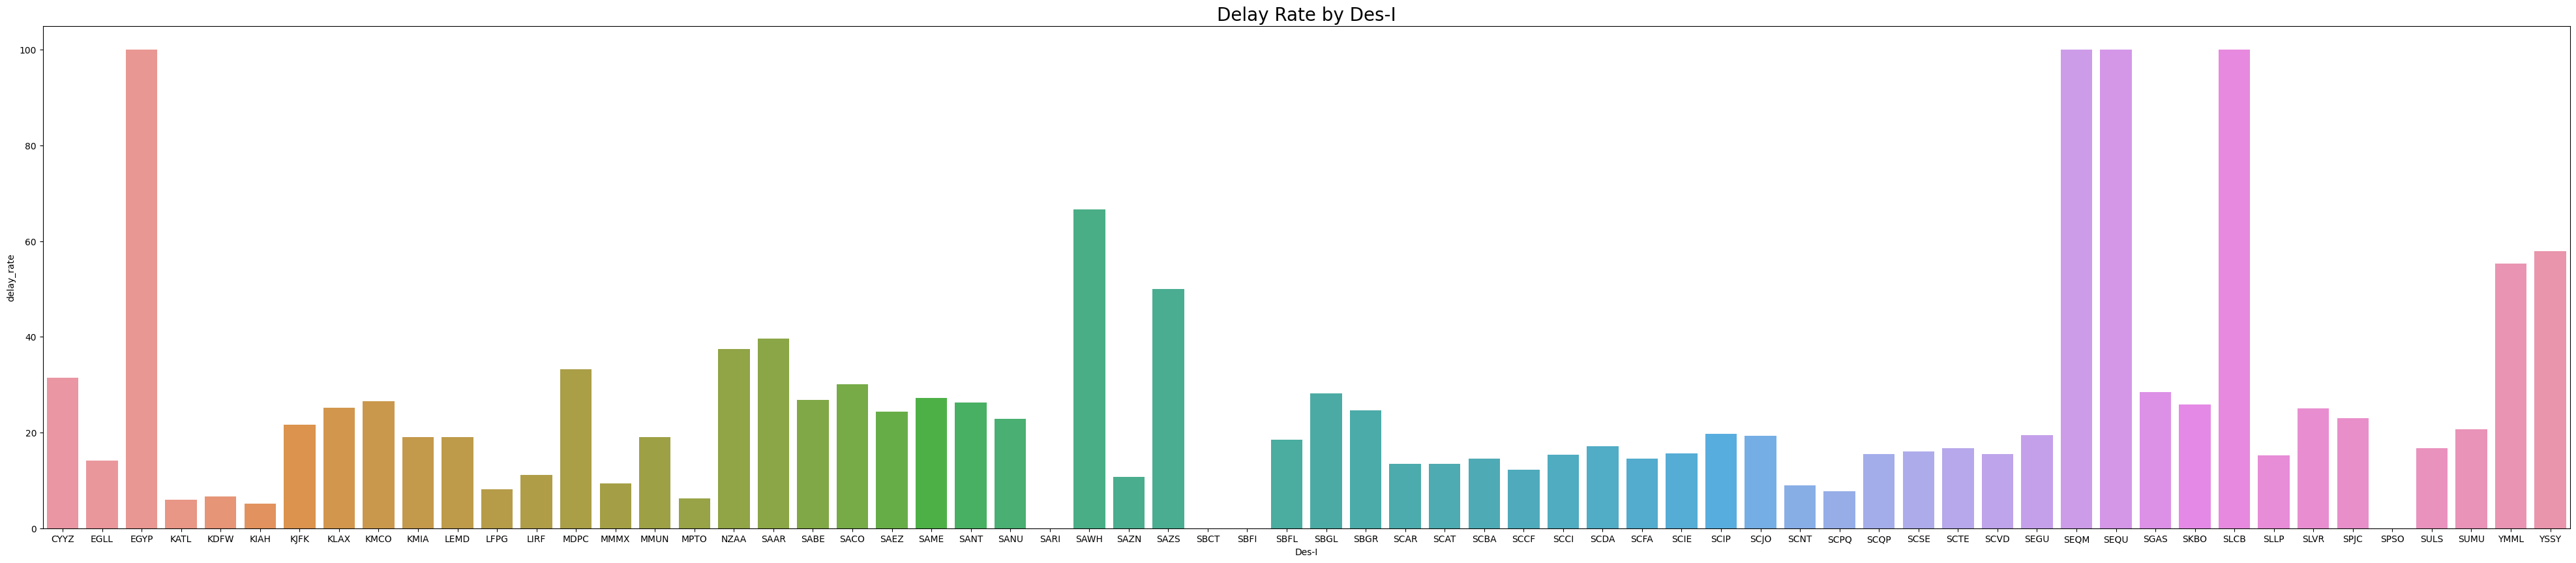

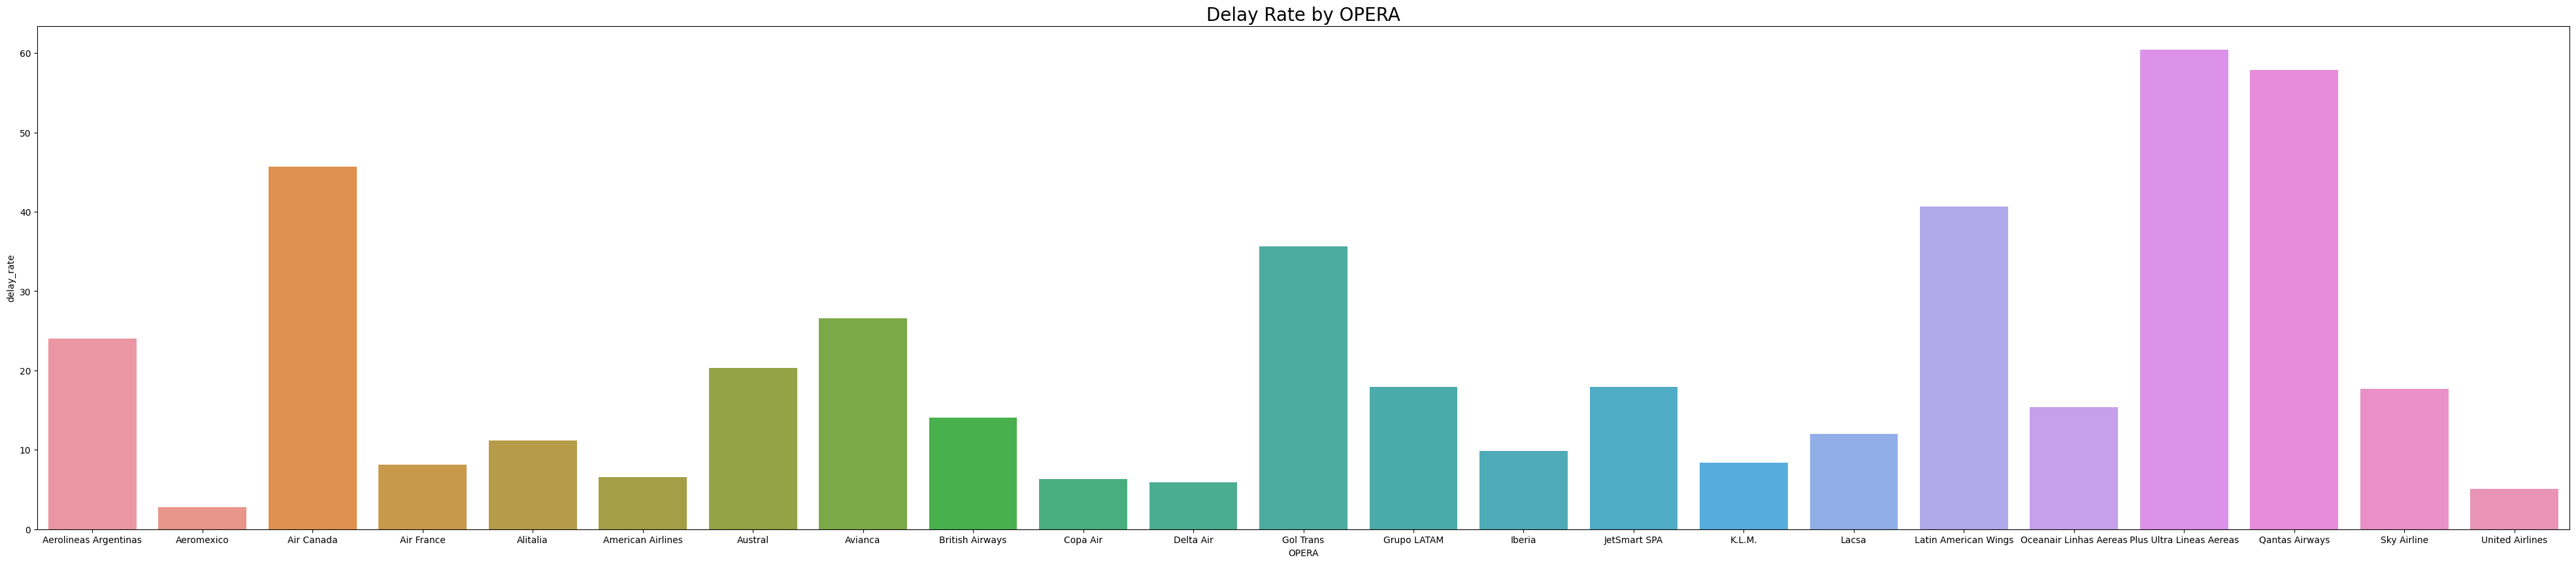

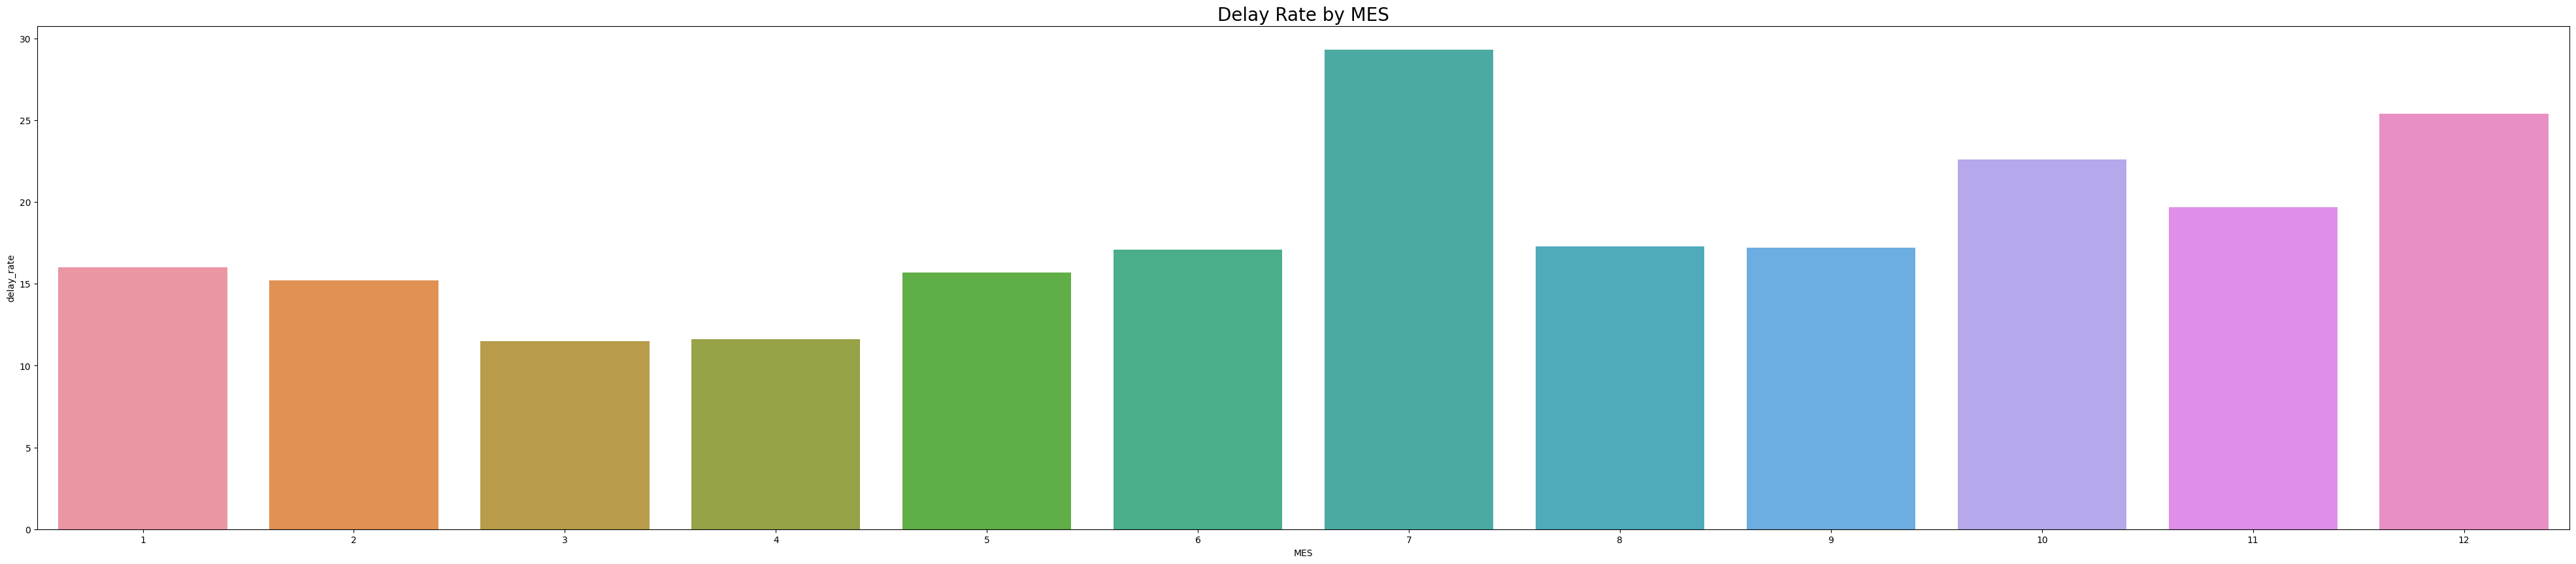

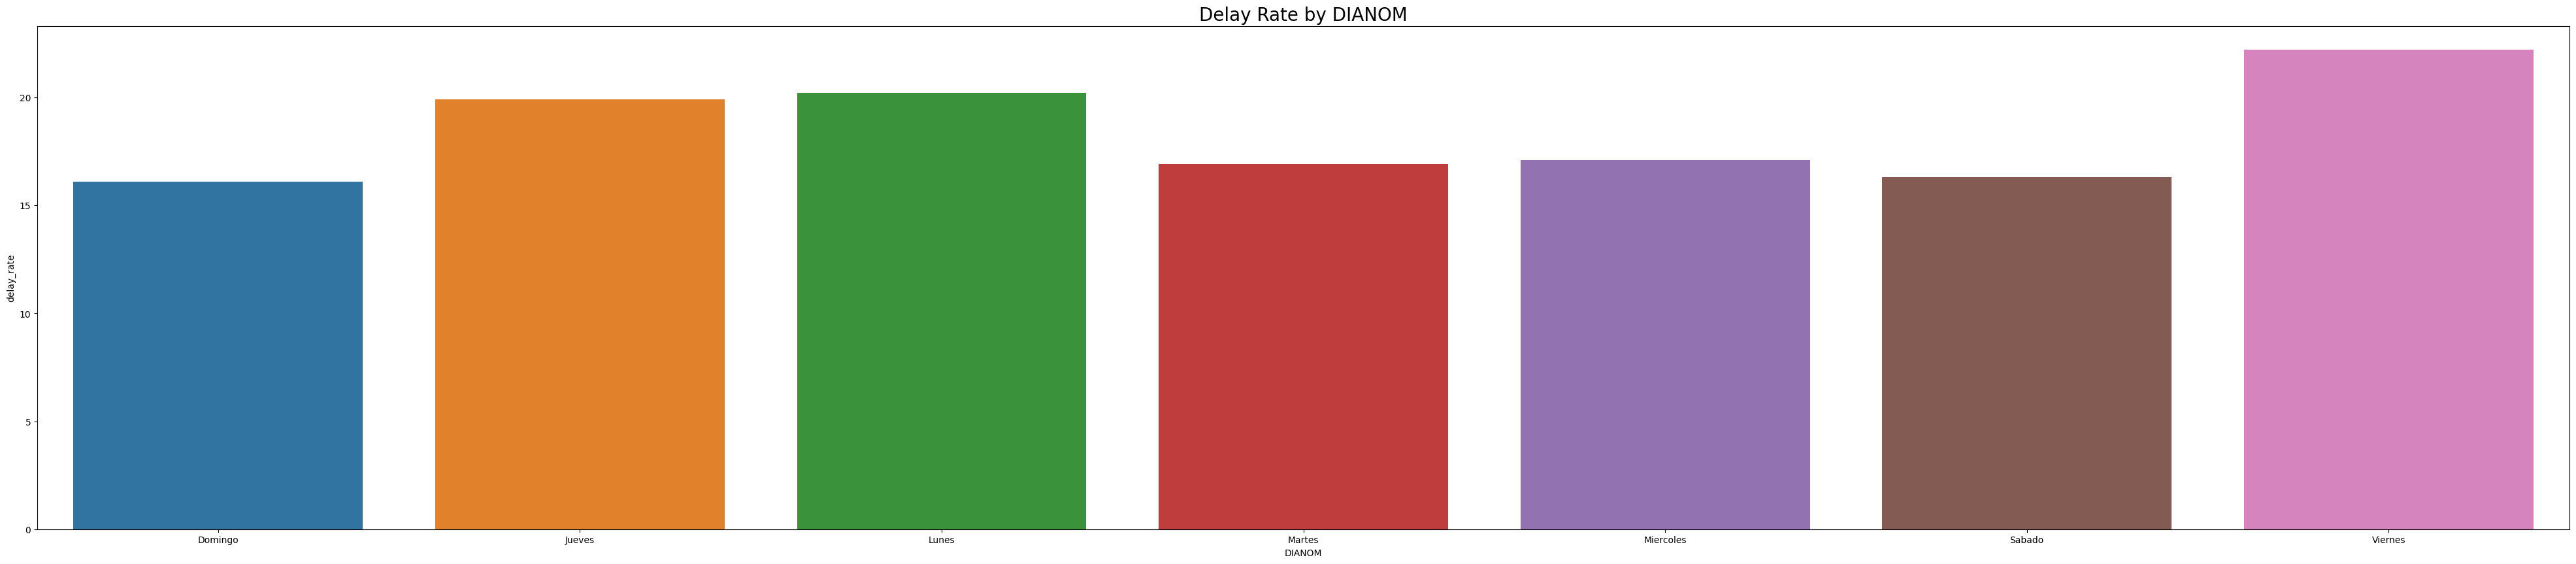

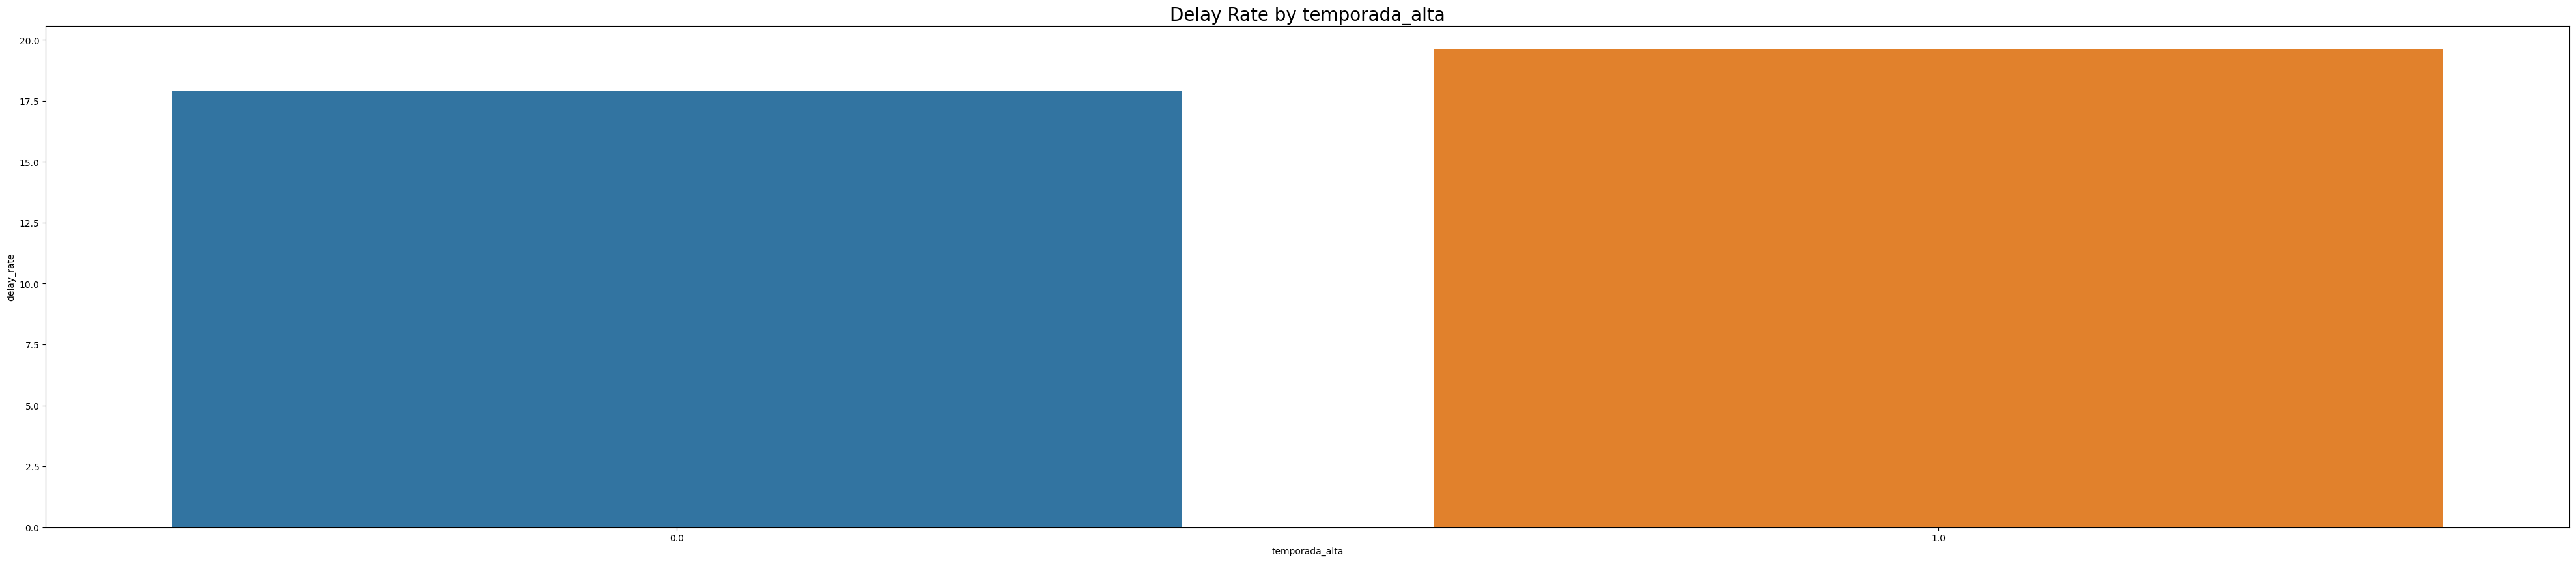

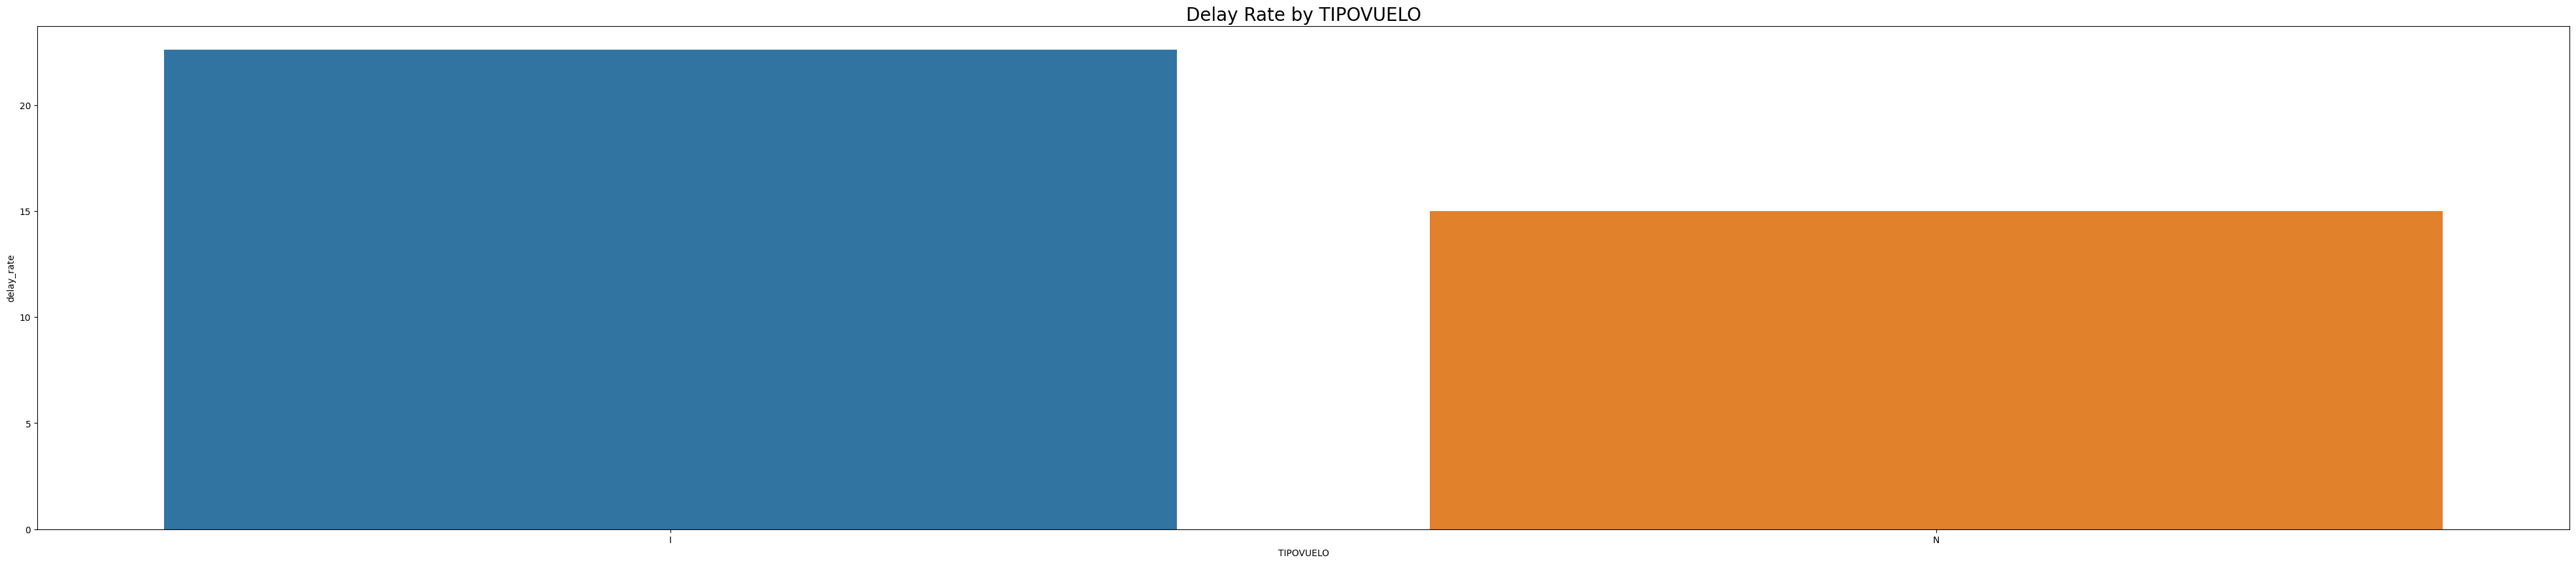

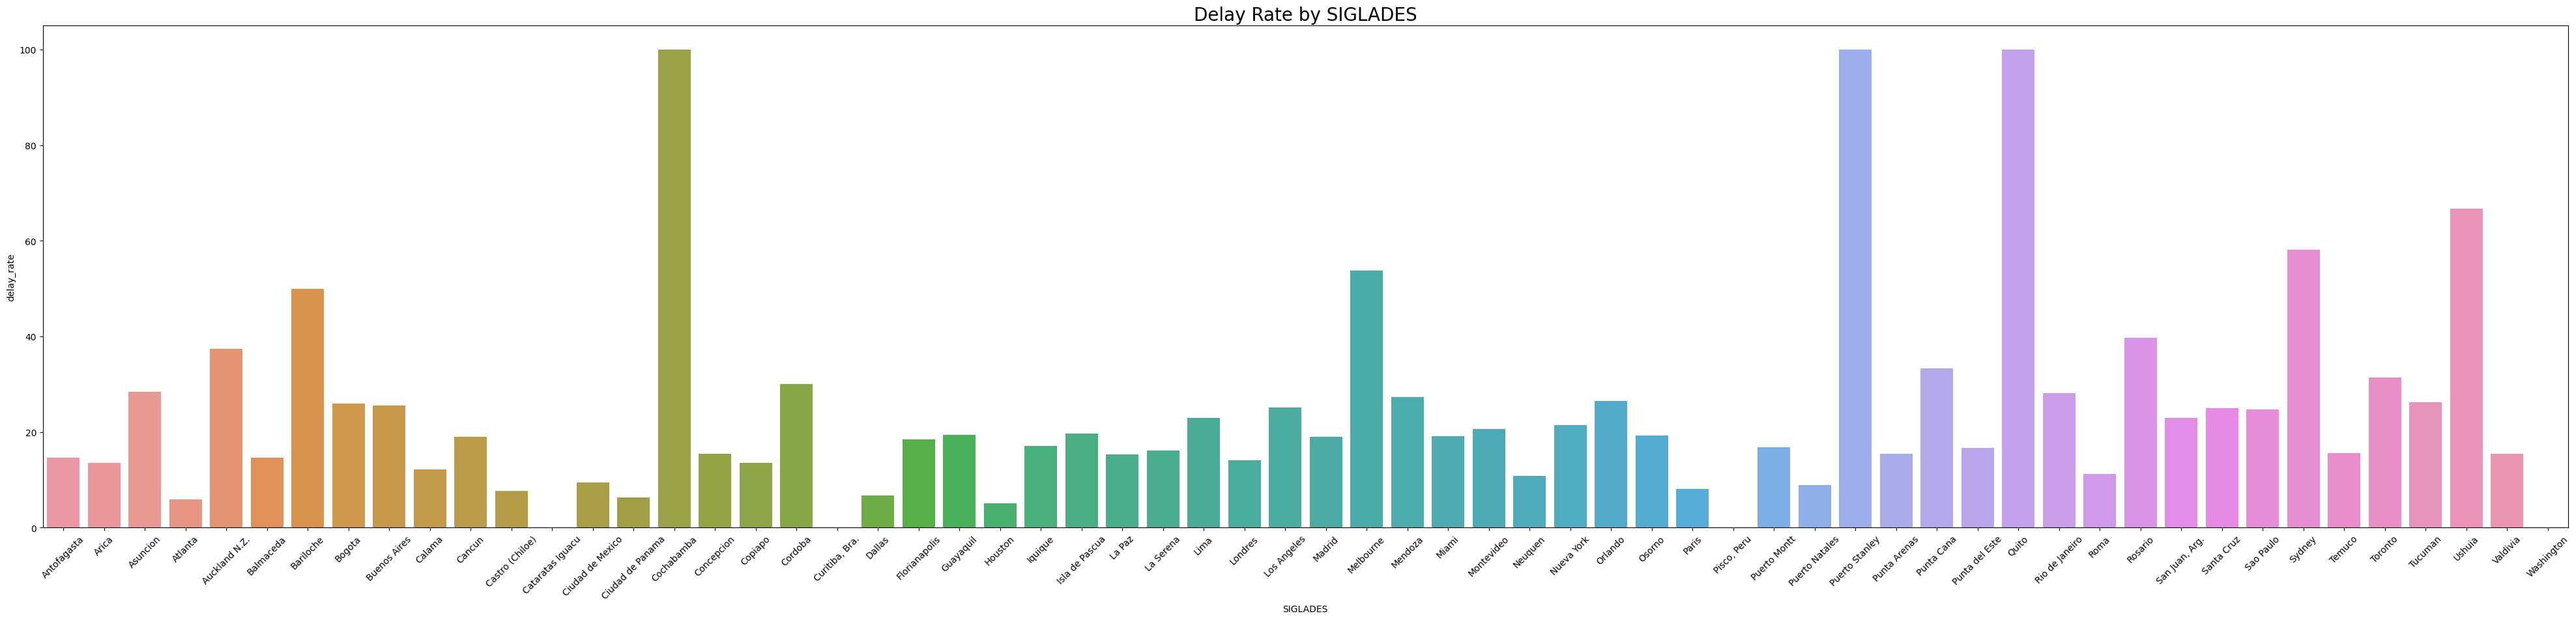

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_group = ["Des-I","OPERA","MES","DIANOM","temporada_alta","TIPOVUELO", "SIGLADES"]
for col in cols_group:
    df_delay_rate = df_raw.groupby(col)["atraso_15"].value_counts(normalize=True).multiply(100).round(1).unstack(level=1).reset_index()[[col,1]].rename(columns={1:'delay_rate'})
    
    fig, ax = plt.subplots(figsize=(50, 10))
    if col == "SIGLADES":
        plt.xticks(rotation=45)
    ax.set_title("Delay Rate by " + col, fontsize=20)
    sns.barplot(x=col, y="delay_rate", data=df_delay_rate, ax=ax)
    plt.show()

<AxesSubplot:title={'center':'atraso_15 Distrrbution'}, xlabel='atraso_15', ylabel='Count'>

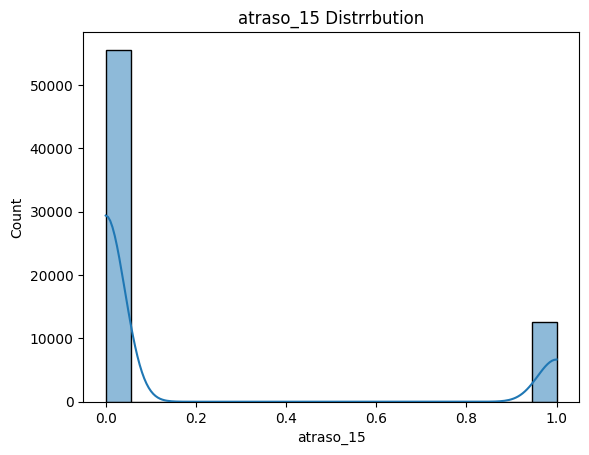

In [134]:
df_raw
fig, ax = plt.subplots()
ax.set_title("atraso_15 Distrrbution")
sns.histplot(x="atraso_15", data=df_raw, ax=ax, kde=True)

#### Q.3 Conclusions
0. The data is clearly and expectedly unbalanced, favoring the lowest number of delay occurrences.
1. The rate of delay_15 is high in different destinations, some is because they record little data, so the mean is affected.
1.1 The destination of SAWH, SAZN [SA] Argentina, followed by SEQM, SEQE, which are the flights to [SE] Ecuador, followed by SLCB [SL] Bolivia, then SLCB [SL] Colombia, YMML, YSS [Y] Australia.
2. The rate of arrears_15 is increased in the month of July.
3. The rate of delay_15 is increased in international flights, which would be predictable due to the distance.
4. The cities with the highest late_15 rate are:
Cochabamba, Puerto Stanley, Quito, Ushuia, Sydney, Melbourne.

Therefore, the country, city of destination directly influences the rate of delay_15 that exists, therefore it is important to include more information about the destination in the data.

### Q.4 Predict the probability of delay

Things to do:
1. Add extra data from ICAO Code
1. Convert to separate features, day, time, year for Date-I and Date-O
2. Convert categorical variables to numerics
3. Add extra data as the weather of that day at the origin of the flight

#### 1. Add new external data based of ICAO

In [135]:
file_data= "iata-icao.csv"
df_icao_external = pd.read_csv(file_data, sep=",")
df_icao_external.pop("iata")
df_icao_external.head(3).append(df_icao_external.tail(3))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,country_code,region_name,icao,airport,latitude,longitude
0,AE,Ash Shariqah,OMSJ,Sharjah International Airport,25.328600,55.517200
1,AE,Abu Zaby,OMAD,Al Bateen Executive Airport,24.428301,54.458099
2,AE,Al Fujayrah,OMFJ,Fujairah International Airport,25.112200,56.324001
8980,ZW,Manicaland,FVCH,Chipinge Airport,-20.206699,32.628300
8981,ZW,Mashonaland West,FVKB,Kariba Airport,-16.519800,28.885000
8982,ZW,Harare,FVHA,Harare International Airport,-17.931801,31.092800


In [136]:
df_processed = df_raw.copy()
df_processed = df_processed.merge(df_icao_external.add_suffix("_Des-I"), left_on="Des-I", right_on="icao_Des-I")
df_processed = df_processed.merge(df_icao_external.add_suffix("_Des-O"), left_on="Des-O", right_on="icao_Des-O")
df_processed.head(3).append(df_processed.tail(3))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,icao_Des-I,airport_Des-I,latitude_Des-I,longitude_Des-I,country_code_Des-O,region_name_Des-O,icao_Des-O,airport_Des-O,latitude_Des-O,longitude_Des-O
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,KMIA,Miami International Airport,25.793200,-80.290604,US,Florida,KMIA,Miami International Airport,25.793200,-80.290604
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,KMIA,Miami International Airport,25.793200,-80.290604,US,Florida,KMIA,Miami International Airport,25.793200,-80.290604
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,KMIA,Miami International Airport,25.793200,-80.290604,US,Florida,KMIA,Miami International Airport,25.793200,-80.290604
62913,2017-12-27 07:45:00,555,SCEL,SULS,SKU,2017-12-27 07:45:00,555,SCEL,SULS,SKU,...,SULS,Capitan de Corbeta Carlos A. Curbelo Internati...,-34.855099,-55.094299,UY,Maldonado,SULS,Capitan de Corbeta Carlos A. Curbelo Internati...,-34.855099,-55.094299
62914,2017-12-31 20:30:00,555,SCEL,SULS,SKU,2017-12-31 20:33:00,555,SCEL,SULS,SKU,...,SULS,Capitan de Corbeta Carlos A. Curbelo Internati...,-34.855099,-55.094299,UY,Maldonado,SULS,Capitan de Corbeta Carlos A. Curbelo Internati...,-34.855099,-55.094299
62915,2017-12-10 00:01:00,1238,SCEL,SLCB,LAN,2017-12-10 01:54:00,1238,SCEL,SLCB,LAN,...,SLCB,Jorge Wilstermann International Airport,-17.421101,-66.177101,BO,Cochabamba,SLCB,Jorge Wilstermann International Airport,-17.421101,-66.177101


#### 2. Convert to separate features, day, time, year for Date-I and Date-O

In [137]:
cols = ["Fecha-I","Fecha-O"]
for col in cols:
    df_processed["year"+"_"+col] = df_processed[col].dt.year
    df_processed["month"+"_"+col] = df_processed[col].dt.month
    df_processed["days_in_month"+"_"+col] = df_processed[col].dt.days_in_month
    df_processed["day"+"_"+col] = df_processed[col].dt.dayofweek
    df_processed["hour"+"_"+col] = df_processed[col].dt.hour
    df_processed["minute"+"_"+col] = df_processed[col].dt.minute
    df_processed["is_month_end"+"_"+col] = df_processed[col].dt.is_month_end.astype(int)
    df_processed["is_month_start"+"_"+col] = df_processed[col].dt.is_month_start.astype(int)
    df_processed["is_quarter_end"+"_"+col] = df_processed[col].dt.is_quarter_end.astype(int)
    df_processed["is_quarter_start"+"_"+col] = df_processed[col].dt.is_quarter_start.astype(int)
    df_processed["is_year_end"+"_"+col] = df_processed[col].dt.is_year_end.astype(int)
    df_processed["is_year_start"+"_"+col] = df_processed[col].dt.is_year_start.astype(int)

We check if there are nans

In [138]:
df_processed[df_processed.isna().any(axis=1)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,days_in_month_Fecha-O,day_Fecha-O,hour_Fecha-O,minute_Fecha-O,is_month_end_Fecha-O,is_month_start_Fecha-O,is_quarter_end_Fecha-O,is_quarter_start_Fecha-O,is_year_end_Fecha-O,is_year_start_Fecha-O


#### 3. Apply Transform Categorical Features to Numeric

First we will check the data types with emphasis on the strings

In [139]:
columns_format= ["Ori-I","Des-I","Emp-I","Ori-O","Des-O", 
                "Emp-O", "SIGLAORI", "periodo_dia", "DIANOM",
                "TIPOVUELO", "OPERA", "SIGLADES"]
dict_format = {col: 'string' for col in columns_format}
df_processed = df_processed.astype(dict_format)

In [140]:
col_categorical = ["Ori-I","Des-I","Emp-I","Ori-O","Des-O", "Emp-O", "SIGLAORI",
                    "periodo_dia","SIGLADES","TIPOVUELO", "country_code_Des-O",
                    "country_code_Des-I", "OPERA"]

for col in col_categorical:
    df_processed[col] = pd.Categorical(df_processed[col]).codes
df_processed

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,days_in_month_Fecha-O,day_Fecha-O,hour_Fecha-O,minute_Fecha-O,is_month_end_Fecha-O,is_month_start_Fecha-O,is_quarter_end_Fecha-O,is_quarter_start_Fecha-O,is_year_end_Fecha-O,is_year_start_Fecha-O
0,2017-01-01 23:30:00,226,0,9,0,2017-01-01 23:33:00,226,0,10,0,...,31,6,23,33,0,1,0,1,0,1
1,2017-01-02 23:30:00,226,0,9,0,2017-01-02 23:39:00,226,0,10,0,...,31,0,23,39,0,0,0,0,0,0
2,2017-01-03 23:30:00,226,0,9,0,2017-01-03 23:39:00,226,0,10,0,...,31,1,23,39,0,0,0,0,0,0
3,2017-01-04 23:30:00,226,0,9,0,2017-01-04 23:33:00,226,0,10,0,...,31,2,23,33,0,0,0,0,0,0
4,2017-01-05 23:30:00,226,0,9,0,2017-01-05 23:28:00,226,0,10,0,...,31,3,23,28,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62911,2017-12-20 07:45:00,555,0,58,25,2017-12-20 07:45:00,555,0,58,24,...,31,2,7,45,0,0,0,0,0,0
62912,2017-12-24 20:30:00,555,0,58,25,2017-12-24 20:24:00,555,0,58,24,...,31,6,20,24,0,0,0,0,0,0
62913,2017-12-27 07:45:00,555,0,58,25,2017-12-27 07:45:00,555,0,58,24,...,31,2,7,45,0,0,0,0,0,0
62914,2017-12-31 20:30:00,555,0,58,25,2017-12-31 20:33:00,555,0,58,24,...,31,6,20,33,1,0,1,0,1,0


Transformed the pandas datetime data type to string to now make it easier to use with weather data

In [141]:
df_processed[["Fecha-I", "Fecha-O"]] = df_processed[["Fecha-I", "Fecha-O"]].apply(lambda x: x.dt.strftime('%Y-%m-%d'))

We obtain the weather information per day (so that its processing is faster).
For this we need to deliver the latitude and longitude coordinates of the scheduled Destination and the date of the day and then we add it to the dataframe.
In this case we use a groupby since there will be many repeated dates and thus we improve the processing performance, then we format and clean.
With this we will have additional data such as: maximum and minimum temperatures, rainfall, etc.

In [142]:
def transform_weather_i(data):
    date = datetime.fromisoformat(data["Fecha-I"].iloc[0])
    location = Point(df_processed.iloc[0,:]["latitude_Des-I"], df_processed.iloc[0,:]["longitude_Des-I"])
    data_weather = Daily(location, date, date).fetch().reset_index()
    data_weather["time"] = data_weather["time"].astype("string")
    data_weather = data_weather.rename(columns= {"time":"Fecha-I"})
    data = data.merge(data_weather.add_suffix("_Des-I"), left_on="Fecha-I", right_on="Fecha-I_Des-I")
    return data

cols_locations = df_processed[[x for x in df_processed.columns if "latitude" in x or "longitude" in x]].columns.to_list()
cols_used = cols_locations+["Fecha-I"]
df_processed = df_processed.groupby(["Fecha-I"],group_keys=False).apply(transform_weather_i)

We will eliminate all variables related to the late flight, such as its rescheduling.
In order to predict if the flight will be delayed based on current data at that time.

In [143]:
cols_del_option = ["Fecha-I", "Fecha-O","icao_Des-I","airport_Des-I","region_name_Des-I",
             "region_name_Des-O", "airport_Des-O","DIANOM","icao_Des-O", "DIA",
             "MES", "AÑO","Fecha-I_Des-I", "dif_min"]

cols_del_feats_relationship = df_processed[[x for x in df_processed.columns if "-O" in x ]].columns.to_list()
col_del = cols_del_option + cols_del_feats_relationship
df_to_use_train = df_processed[df_processed.columns[~df_processed.columns.isin(col_del)]].copy()

For ease we define the variable target=delay 15

In [144]:
df_train = df_to_use_train
df_train = df_train.rename(columns={"atraso_15": "target"})
y  = df_train.pop("target")
X = df_train

### Q.5 Model Training

In this section, you can use a cross validation with a framework based on a Bayesian search in order to find the best set of hyperparameters of the model with probabilities.

It is an approach that has results and is actively used, but in terms of time it was not applied.
But anyway we use a training set, test and then we validate the performance with another final validation set of the model.

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [146]:
import lightgbm as lgbm
train_data = lgbm.Dataset(X_train.to_numpy(), label=y_train)
test_data = lgbm.Dataset(X_test.to_numpy(), label=y_test)

In [147]:
def get_metrics(model, X, y_true, categories):
    '''
    The classification metrics are displayed on
    the screen and saved in metrics_train.csv
    Args:
        model (sklearn.model): Model to use
        X (numpy.array): Data to use
        y_true (numpy.array): Data to use
        categories (list): List of categories
    Returns:
        pandas.DataFrame: Dataframe with the metrics
    '''
    print('Metrics...')
    val_pred = model.predict(X)
    report = classification_report(y_true.values, val_pred.round(),  output_dict=True,target_names=categories, labels=[1,0] )
    df = pd.DataFrame(report).T
    df.to_csv('metrics_train.csv')
    display(df)
    print('Metrics successfully')
    return df

In this section we define the LightGBM model for its speed and ease of use.
We could use different models such as XGBoost, RandomForest, LSTM or also neural networks.
According to the state of the art, it has been appreciated that neural networks can have a better performance in this problem, but it requires much greater configuration training for each layer, which is why it has been ruled out in this challenge.

In [148]:
params={     
        "objective" :"binary",
        'learning_rate': 0.15,
        "metric": "auc",
        "min_child_weight":100,
        "boosting": "gbdt",
        "scale_pos_weight":99,
        'colsample_bytree': 0.9,
        "reg_alpha": 1,
        "reg_lambda": 1,
        "verbose": 0
    }

classifier = lgbm.train(params,
                        train_data,                        
                        valid_sets= test_data,
                        categorical_feature = "auto",
                        num_boost_round=3000
                        )


df_metrics = get_metrics(classifier, X_val, y_val, ["atraso_15","no_retraso_15"])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's auc: 0.628112
[2]	valid_0's auc: 0.647921
[3]	valid_0's auc: 0.651927
[4]	valid_0's auc: 0.662024
[5]	valid_0's auc: 0.661067
[6]	valid_0's auc: 0.664316
[7]	valid_0's auc: 0.664641
[8]	valid_0's auc: 0.666333
[9]	valid_0's auc: 0.665887
[10]	valid_0's auc: 0.666794
[11]	valid_0's auc: 0.666739
[12]	valid_0's auc: 0.668056
[13]	valid_0's auc: 0.669337
[14]	valid_0's auc: 0.672228
[15]	valid_0's auc: 0.673137
[16]	valid_0's auc: 0.672577
[17]	valid_0's auc: 0.676196
[18]	valid_0's auc: 0.678747
[19]	valid_0's auc: 0.679263
[20]	valid_0's auc: 0.681893
[21]	valid_0's auc: 0.683804
[22]	valid_0's auc: 0.685479
[23]	valid_0's auc: 0.687818
[24]	valid_0's auc: 0.689934
[25]	valid_0's auc: 0.692285
[26]	valid_0's auc: 0.693223
[27]	valid_0's auc: 0.6948

,precision,recall,f1-score,support
atraso_15,0.314021,0.600159,0.412309,3784.000000
no_retraso_15,0.888183,0.707816,0.787807,16979.000000
accuracy,0.688195,0.688195,0.688195,0.688195
macro avg,0.601102,0.653987,0.600058,20763.000000
weighted avg,0.783543,0.688195,0.719374,20763.000000


Metrics successfully


#### Explaining the model

Now through SHAP we will verify the most important characteristics of the model to generate the classification of delay or not.

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


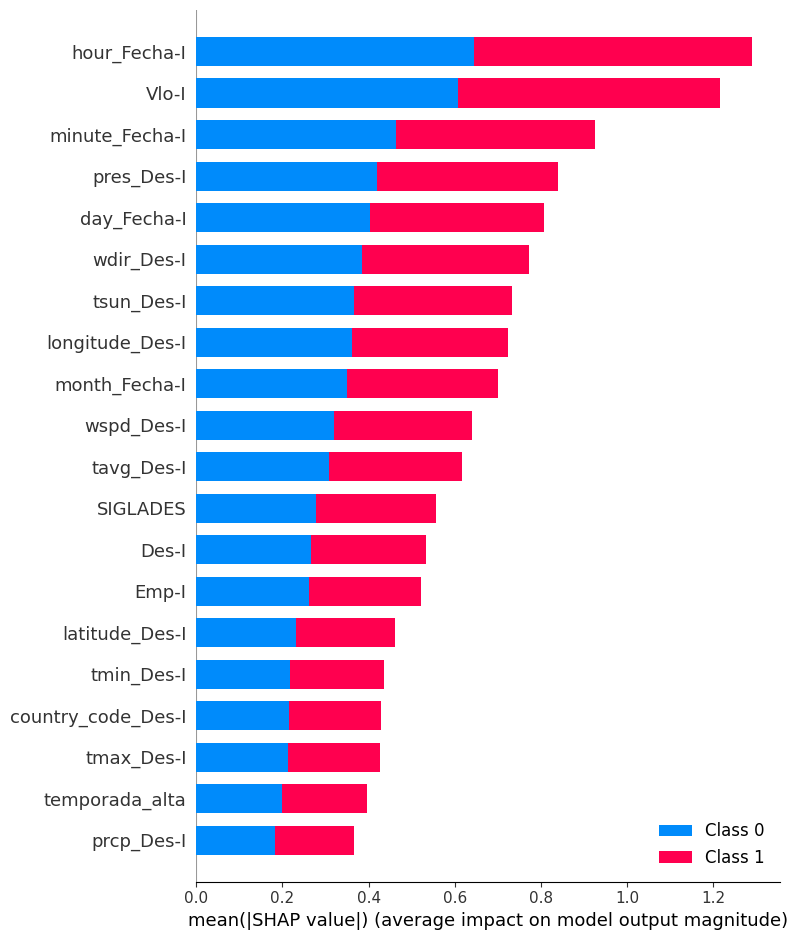

In [149]:
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [150]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X_train.iloc[:1000,:])

### 1.5 Conclusions

It can be seen that the features related to the date and its associates, as well as new ones such as weather data, have a great impact on the generalization of the model.

1. Metric Training: The metric used to train the model has been the AUC. This allows us to clearly identify whether the model has been able to distinguish the generalizations to categorize each class. The higher its value, the greater its differentiation and therefore its general performance.
Here we can use different approaches, another could be recall, due to its nature as an unbalanced problem, since we would force the model to capture the important class (delay).
On the other hand f1-score is a harmonic average and is another candidate that can be used to find the best performance of the model.

2. Improvements:
   1. The first to implement is to improve training, as mentioned above. Using cross validation, hyperparameter calibration framework like hyperopt.
    2. Due to the nature of the unbalanced problem, the following is to try strategies and algorithms for the generation of synthetic data to deliver more data of the unfavorable class. You can use libraries such as smote, smoteen, imabalance-learn, among others.
    3. Use other ML algorithm models. as neural networks, since in the state of the art it can be seen that they have a great difference, up to 15% higher easily.
    4. Apply Feature Enginner in depth, eg in the selection of features, in which through eg: Pearson or Chisquare correlation to find the features that most impact the model and then filter them. This is because more data is not always better, since they interfere with learning if they do not have relevant information for the problem. Or also filter by the variance of each feature, because if we have a feature for example the year, and it is always the same year, for example 2017, its variance will be low so it has better information to provide to the ML model. making it difficult to generalize.
    5. Add new data, this can be expanding the dataset to more years of history, or adding external sources of information, such as the number of people per flight, types of tickets on each flight, information on trendic_topic events, for example, carried out in the place destination, since a concert by a renowned and famous artist can influence the aeronautical flow and delays. Another example of data may be related to the ticket, since the purchase time of the customers may be related since it may intrinsically have information on relevant events that may be happening at the destination of the flight or its origin causing the delay of this.
    6. Another way is to simplify the data and obtain international data on the problem, then train a deep learning model to achieve general knowledge and train another deep learning model but with specific data from the country in question such as Chile and in this way transfer learning which today is widely used to achieve better performance by nesting multiple predictive models and the generation they have generated.
